In [9]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from numpy import linalg as LA

# Open the file containing our data
df = pd.read_csv(Path("data/penguins_size.csv"))

# Replace . that are in our data with NaN
df.replace('.', np.nan, inplace=True)

# Drop all rows that contain NaN as a value, since we don't want to use those in our calculations
df = df.dropna()

# The numerical attributes we want to use are in columns 3, 4, 5 and 6
cols = range(2, 6)

# Get numerical data
num_df = df.iloc[:, cols]

# turn num data into matrix
matrix = num_df.to_numpy()
matrix

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

U: [[-0.45375317 -0.6001949   0.64249509  0.14516955]
 [ 0.39904723 -0.79616951 -0.42580043 -0.1599044 ]
 [-0.576825   -0.00578817 -0.23609516 -0.78198369]
 [-0.54967471 -0.07646366 -0.59173738  0.58468615]]
S:
[914.20345657 259.11301807 122.757959    35.92556636]
Vh:
[[-0.45375317  0.39904723 -0.576825   -0.54967471]
 [-0.6001949  -0.79616951 -0.00578817 -0.07646366]
 [ 0.64249509 -0.42580043 -0.23609516 -0.59173738]
 [ 0.14516955 -0.1599044  -0.78198369  0.58468615]]
Principal direction 1: 
[-0.45375317 -0.6001949   0.64249509  0.14516955]
Principal direction 2: 
[ 0.39904723 -0.79616951 -0.42580043 -0.1599044 ]
Variance explained: 0.8808682242049918


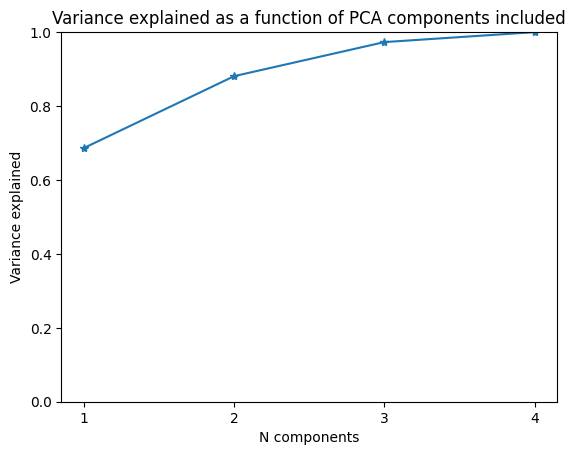

(333,)


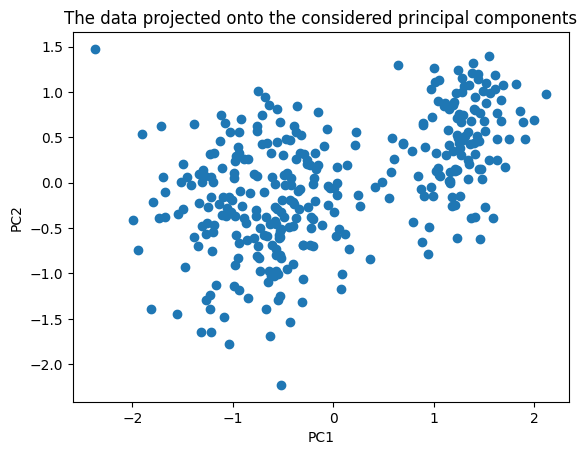

In [35]:
norm_data = (matrix - matrix.mean(axis=0)) / matrix.std(axis=0)
xt_x = np.dot(norm_data.T,norm_data)
U,S,Vh = np.linalg.svd(xt_x)
print(f'U: {U}')
print(f'S:\n{S}')
print(f'Vh:\n{Vh}')
print(f'Principal direction 1: \n{Vh[:,0]}')
print(f'Principal direction 2: \n{Vh[:,1]}')


def var_explained_n(n_components):
    return S[:n_components].sum()/S.sum()

print(f"Variance explained: {var_explained_n(2)}")

var_explained_each = np.array([var_explained_n(i) for i in range(1,5)])
fig,ax = plt.subplots(1,1)
x_vals = range(1,5)
ax.plot(x_vals,var_explained_each,'*-')
ax.set_title('Variance explained as a function of PCA components included')
ax.set_xlabel('N components')
ax.set_ylabel('Variance explained')
ax.set_xticks(np.arange(min(x_vals), max(x_vals)+1, 1.0))
ax.set_ylim(0,1)
plt.show()


b1 = np.dot(norm_data,Vh.T[0])
b2 = np.dot(norm_data,Vh.T[1])
print(b1.shape)


principal_components = np.array((b1,b2))
plt.scatter(b1,b2)
plt.title('The data projected onto the considered principal components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()